# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review any of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)


### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

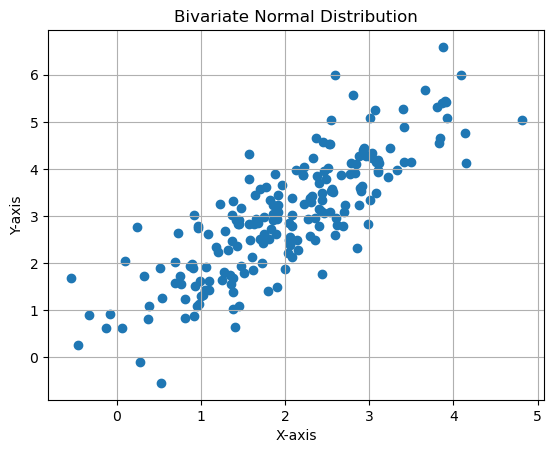

In [ ]:
#Problem 1A (15 points)
import numpy as np
import matplotlib.pyplot as plt


mean = np.array([2, 3])
covariance_matrix = np.array([[1, 1.2], [1.2, 2]])


np.random.seed(45)  
samples = np.random.multivariate_normal(mean, covariance_matrix, 200)

plt.scatter(samples[:, 0], samples[:, 1])
plt.title('Bivariate Normal Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)



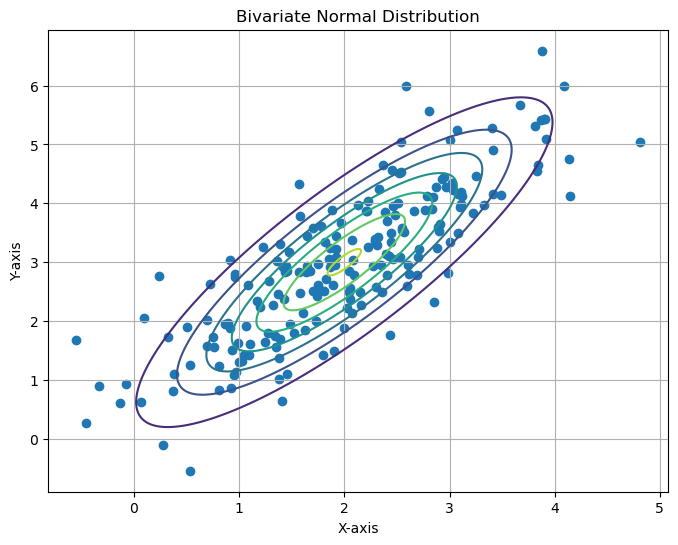

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal 

mean = np.array([2, 3])
covariance_matrix = np.array([[1, 1.2], [1.2, 2]])

np.random.seed(45)  
samples = np.random.multivariate_normal(mean, covariance_matrix, 200)

plt.figure(figsize=(8, 6))

x, y = np.mgrid[0:4:.01, 0:6:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mean, covariance_matrix)
plt.contour(x, y, rv.pdf(pos))

plt.scatter(samples[:, 0], samples[:, 1])

plt.title('Bivariate Normal Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)





## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) compute the projection of the simulated vectors onto the subspace spanned by the first two principal components.

### Problem 2A (5 points)

What determines the principal components ?

Answer:  The principal components are determined by the directions of maximum variance in the data, and these directions are obtained through the SVD of the covariance matrix. It is the U in the SVD Equation that breaks down the matrix to three components 

### Problem 2B (5 points)

What determines the positive or negative correlations between the components ?

Answer:
The sign of the correlation depends on whether the covariance is positive or negative. Positive covariance suggests that the variables tend to increase or decrease together, leading to a positive correlation. Negative covariance suggests that one variable tends to increase when the other decreases

### Problem 2C (10 points)

Plot the projected vectors and show whether or not the projection agrees with the positive or negative correlations of the original matrix.



Principal components matrix shape: (3, 2)
Projected vectors shape: (1000, 2)


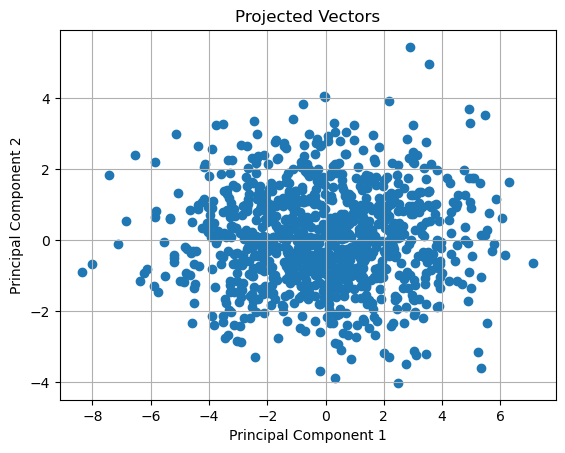

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


covariance_matrix = np.array([[4, 2, 1],
                              [2, 3, 1.5],
                              [1, 1.5, 2]])


mean = np.zeros(3)
random_vector = np.random.multivariate_normal(mean, covariance_matrix, size=1000)


U, s, Vt = np.linalg.svd(covariance_matrix)

U_2 = U[:, :2]


projected_vectors = np.dot(random_vector, U_2)


print("Principal components matrix shape:", U_2.shape)
print("Projected vectors shape:", projected_vectors.shape)

plt.scatter(projected_vectors[:, 0], projected_vectors[:, 1])
plt.title('Projected Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [ ]:
#The original matrix had positive correlations. The projection I honestly cannot tell, however, based on the intuition, I would say
#It disagrees with the original matrix's correlations.